In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Plotting a scatter plot using given points:

In [8]:
cluster_array=np.array([[0,0],[5,0],[5,1],[0,1],[0,0.5]])
cluster_array

array([[0. , 0. ],
       [5. , 0. ],
       [5. , 1. ],
       [0. , 1. ],
       [0. , 0.5]])

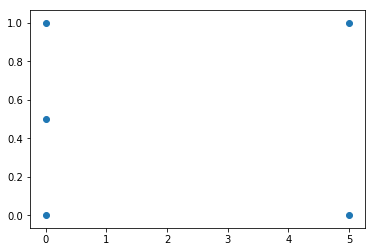

In [9]:
plt.scatter(cluster_array[:,0],cluster_array[:,1])
plt.show()

In [12]:
cluster_array1=np.array([[1,1],[1.5,2],[3,4],[5,7],[3.5,5],[4.5,5],[3.5,4.5]])
cluster_array1

array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

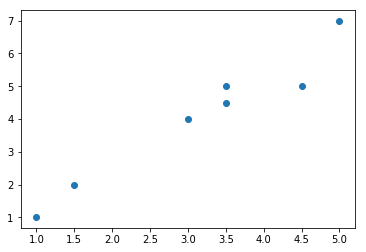

In [13]:
plt.scatter(cluster_array1[:,0],cluster_array1[:,1])
plt.show()

# Using KMeans Clustering

In [10]:
km=KMeans(n_clusters=2)
km.fit(cluster_array)
print("The centers of clusters are:\n", km.cluster_centers_)
print("Cluster Labels: ",km.labels_)

The centers of clusters are:
 [[0.  0.5]
 [5.  0.5]]
Cluster Labels:  [0 1 1 0 0]


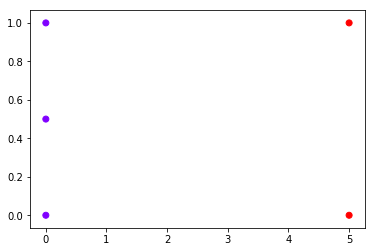

In [11]:
plt.scatter(cluster_array[:,0],cluster_array[:,1], c=km.labels_, cmap='rainbow')
plt.show()

In [27]:
km=KMeans(n_clusters=3)
km.fit(cluster_array1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
km=KMeans(n_clusters=3)
km.fit(cluster_array1)
print("The centers of clusters are:\n", km.cluster_centers_)
print("Cluster Labels: ",km.labels_)

The centers of clusters are:
 [[3.625 4.625]
 [1.25  1.5  ]
 [5.    7.   ]]
Cluster Labels:  [1 1 0 2 0 0 0]


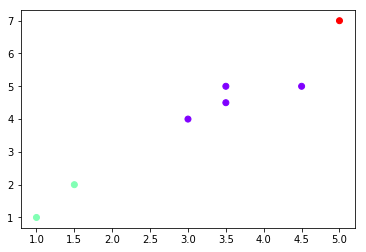

In [26]:
plt.scatter(cluster_array1[:,0],cluster_array1[:,1], c=km.labels_, cmap='rainbow')
plt.show()

# Using Mall Customer data: 21/06/19

In [189]:
mall=pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


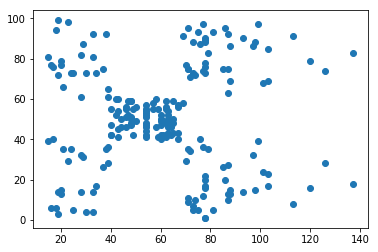

In [10]:
x=mall['Income']
y=mall['SpendingScore']
plt.scatter(x,y)
plt.show()

In [168]:
df=mall[['Income','SpendingScore']]
df.head()

,Income,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [169]:
km=KMeans(n_clusters=5)
km.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
print("The centers of clusters are:\n", km.cluster_centers_)
print("Cluster Labels: ",km.labels_)

The centers of clusters are:
 [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
Cluster Labels:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


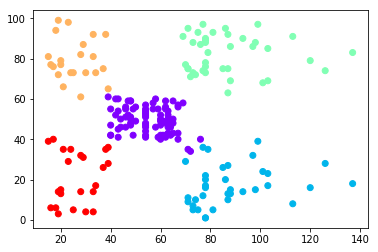

In [39]:
plt.scatter(mall['Income'],mall['SpendingScore'],c=km.labels_, cmap='rainbow')
plt.show()

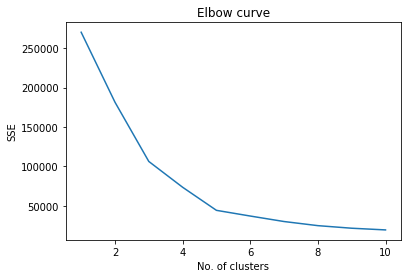

In [40]:
#Using Elbow method for the optimal number of clusters:

ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    ls.append(km.inertia_) #Sum of squared distances of samples to their closest cluster centre
plt.plot(range(1,11),ls)
plt.title("Elbow curve")
plt.xlabel("No. of clusters")
plt.ylabel("SSE")
plt.show()



In [41]:
km=KMeans(n_clusters=3)
y_means=km.fit_predict(df)

In [42]:
print("The centers of clusters are:\n", km.cluster_centers_)
print("Cluster Labels: ",km.labels_)

The centers of clusters are:
 [[86.53846154 82.12820513]
 [44.15447154 49.82926829]
 [87.         18.63157895]]
Cluster Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


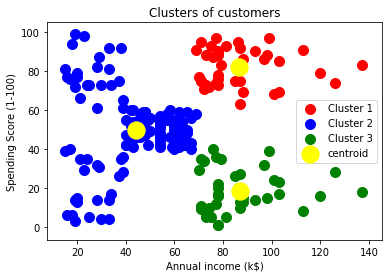

In [46]:
#Visualizing the clusters:

plt.scatter(df[y_means==0]['Income'],df[y_means==0]['SpendingScore'], s=100, c='red',label='Cluster 1')
plt.scatter(df[y_means==1]['Income'],df[y_means==1]['SpendingScore'], s=100, c='blue',label='Cluster 2')
plt.scatter(df[y_means==2]['Income'],df[y_means==2]['SpendingScore'], s=100, c='green',label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c='yellow', label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [47]:
km=KMeans(n_clusters=5) #Taking 5 clusters
y_means=km.fit_predict(df)
print("The centers of clusters are:\n", km.cluster_centers_)
print("Cluster Labels: ",km.labels_)

The centers of clusters are:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
Cluster Labels:  [2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


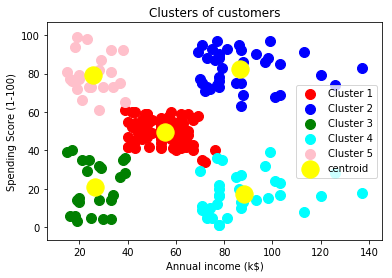

In [51]:

plt.scatter(df[y_means==0]['Income'],df[y_means==0]['SpendingScore'], s=100, c='red',label='Cluster 1')
plt.scatter(df[y_means==1]['Income'],df[y_means==1]['SpendingScore'], s=100, c='blue',label='Cluster 2')
plt.scatter(df[y_means==2]['Income'],df[y_means==2]['SpendingScore'], s=100, c='green',label='Cluster 3')
plt.scatter(df[y_means==3]['Income'],df[y_means==3]['SpendingScore'], s=100, c='cyan',label='Cluster 4')
plt.scatter(df[y_means==4]['Income'],df[y_means==4]['SpendingScore'], s=100, c='pink',label='Cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c='yellow', label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [52]:
list(mall)

['CustomerID', 'Genre', 'Age', 'Income', 'SpendingScore']

In [89]:
#Adding a new column to the existing dataframe:

df1= mall
df1['Class']= km.labels_
df1.head()

,CustomerID,Genre,Age,Income,SpendingScore,Class
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df1['labels_cat']=label_encoder.fit_transform(df1['Genre'])
df1.head()

,CustomerID,Genre,Age,Income,SpendingScore,Class,labels_cat
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,2,0


In [185]:
X=df1[['Age','SpendingScore','labels_cat','Income']]
y=df1[['Class']]

In [186]:
X.head()

,Age,SpendingScore,labels_cat,Income
0,19,39,1,15
1,21,81,1,15
2,20,6,0,16
3,23,77,0,16
4,31,40,0,17


In [100]:
#Splitting the data into train & test:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [101]:
X_train.shape

(160, 4)

In [104]:
#Using KNN Algorithm:

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
print("KNN Score= ",knn.score(X_test,y_test)*100)

prediction=knn.predict(X_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is:",cm, sep='\n')

KNN Score=  95.0
Confusion Matrix is:
[[11  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  7  0]
 [ 1  0  0  0  4]]


In [109]:
#Using Naive Bayes Algorithm:

mb=MultinomialNB() #Using Multinomial Naive Bayes Algorithm
mb.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [111]:
#Prediction on test set:

y_pred=mb.predict(X_test)
print("Accuracy in %: " , metrics.accuracy_score(y_test, y_pred)*100)
cm3=confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:", cm3, sep='\n')

Accuracy in %:  85.0
Confusion Matrix is:
[[ 9  2  0  0  0]
 [ 0 10  0  0  0]
 [ 2  0  4  0  0]
 [ 1  0  0  7  0]
 [ 0  1  0  0  4]]


In [122]:
bb=BernoulliNB() #Using Multinomial Naive Bayes Algorithm
bb.fit(X_train,y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [123]:
y_pred=mb.predict(X_test)
print("Accuracy in %: " , metrics.accuracy_score(y_test, y_pred)*100)
cm3=confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:", cm3, sep='\n')

Accuracy in %:  85.0
Confusion Matrix is:
[[ 9  2  0  0  0]
 [ 0 10  0  0  0]
 [ 2  0  4  0  0]
 [ 1  0  0  7  0]
 [ 0  1  0  0  4]]


In [112]:
#Implementing Decision Tree:

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
y_pred= clf.predict(X_test)
#y_pred

In [114]:

y_pred=clf.predict(X_test)
print("Accuracy in %: " , metrics.accuracy_score(y_test, y_pred)*100)
prediction=clf.predict(X_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is:",cm, sep='\n')


Accuracy in %:  92.5
Confusion Matrix is:
[[10  1  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  7  0]
 [ 1  0  0  0  4]]


In [117]:
#Pruning the decison tree:

clf = DecisionTreeClassifier(criterion="entropy", splitter='random',
                            max_leaf_nodes=10, min_samples_leaf=5,
                            max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [118]:
y_pred= clf.predict(X_test)
#y_pred

In [119]:
y_pred=clf.predict(X_test)
print("Accuracy in %: " , metrics.accuracy_score(y_test, y_pred)*100)
prediction=clf.predict(X_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is:",cm, sep='\n')

Accuracy in %:  95.0
Confusion Matrix is:
[[11  0  0  0  0]
 [ 0 10  0  0  0]
 [ 1  0  5  0  0]
 [ 0  0  0  8  0]
 [ 1  0  0  0  4]]


In [120]:
#Using random forest:

rf= RandomForestClassifier(n_estimators=100, random_state=0) 

#n_estimators indicates the no.of trees in the forest:

rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

In [121]:
#Fit an AdaBoost model:

ab=AdaBoostClassifier(n_estimators=100) 
ab.fit(X_train, y_train)
y_pred=ab.predict(X_test)
accuracy_score(y_test, y_pred)

0.925

In [124]:
#Fit an XGBoost model:

xb=XGBClassifier(n_estimators=100) 
xb.fit(X_train, y_train)
y_pred=ab.predict(X_test)
accuracy_score(y_test, y_pred)

0.925

In [125]:
#Fit a gradientboost model:

grb=GradientBoostingClassifier(n_estimators=100) 
grb.fit(X_train, y_train)
y_pred=ab.predict(X_test)
accuracy_score(y_test, y_pred)

0.925

In [126]:
#Fit to Logistic Regression model:

regressor=LogisticRegression()
regressor=LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
#Printing the coefficient & intercept values:

print("a1=",regressor.coef_)
print("a0=",regressor.intercept_)

a1= [[ 0.02994652  0.00273782 -0.41220887 -0.01604963]
 [-0.17213992  0.06572246 -0.45826387  0.06068194]
 [ 0.14361422 -0.089326    0.31158138 -0.17208351]
 [-0.112398   -0.39371119 -0.48331478  0.23674528]
 [-0.10981003  0.21680765 -0.32227611 -0.30625229]]
a0= [-0.41036282 -3.65826896  1.84224642 -0.54441681 -0.3087851 ]


In [129]:
#Printing the predicted values:

y_pred=regressor.predict(X_test)
print(y_pred)

[2 3 0 0 1 3 4 0 2 3 0 1 3 3 0 4 4 3 4 0 1 1 0 1 0 0 1 1 0 0 0 0 3 1 2 1 0
 0 0 0]


In [130]:
#Printing the confusion matrix:

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[10  1  0  0  0]
 [ 2  8  0  0  0]
 [ 3  0  3  0  0]
 [ 1  0  0  7  0]
 [ 1  0  0  0  4]]


In [132]:
df1.head()

,CustomerID,Genre,Age,Income,SpendingScore,Class,labels_cat
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,2,0


In [151]:
X=df1[['Age','Income']]
y=df1[['SpendingScore']]

In [152]:
lm=LinearRegression()
lm=lm.fit(X,y)

In [153]:
y_pred=lm.predict(X)
y['y_pred']=y_pred
y.head()

,SpendingScore,y_pred
0,39,61.943123
1,81,60.733548
2,6,61.344084
3,77,59.529722
4,40,54.697173


In [154]:
print(lm.coef_)
print(lm.intercept_)

[[-0.60478726  0.00574856]]
[73.34785222]


In [155]:
rmse=np.sqrt(mean_squared_error(y[["SpendingScore"]],y_pred))
rmse

24.340281817210645

In [156]:
r2 = lm.score(X, y[["SpendingScore"]])
r2

0.10711158828485168

In [ ]:
pd.pandas_profiling